### IMPORTING THE LIBRARIES REQUIRES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import torch
import torch.optim as optim
from torch import nn
import torch.utils.data
from torchvision import datasets, transforms
import torchvision
# insrtalling torch info

!pip install torchinfo
from torchinfo import summary
import time
import itertools
from torch.utils.data import Dataset, DataLoader
!pip install torchmetrics
import torchmetrics

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive' , force_remount = True)




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 10.9 MB/s eta 0:00:00
Mounted at /content/drive


### unzipping the dataset from google drive

In [2]:
import os

ass2_path = "\"drive/MyDrive/Colab Notebooks/Intro_to_ML/Assigment_2\""
path_to_zip = os.path.join(ass2_path, "cnn_dataset.zip")
!unzip -q -o {path_to_zip}


### taking the dataset

In [3]:

dataset = torchvision.datasets.ImageFolder('/content/cnn_dataset', transform=torchvision.transforms.ToTensor())
print(dataset.classes)
print(dataset)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Dataset ImageFolder
    Number of datapoints: 100800
    Root location: /content/cnn_dataset
    StandardTransform
Transform: ToTensor()


### Splitting the dataset into test , train and split.

In [4]:
train_sz = int(0.8 * len(dataset))
val_sz = int(0.1 * len(dataset))
test_size = len(dataset) - train_sz - val_sz
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_sz, val_sz, test_size])

### creating data loaders and classes

In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)
classes = dataset.classes
print(f'no of samples: {len(dataset)}')
print(f'no of samples for  class: {len(dataset) // len(classes)}')
print(f'no of samples in test set: {len(test_set)}')
print(f'no of samples in validation set: {len(val_set)}')
print(f'no of samples in train set: {len(train_set)}')

no of samples: 100800
no of samples for  class: 2800
no of samples in test set: 10080
no of samples in validation set: 10080
no of samples in train set: 80640


In [6]:
def imshow(img):
   img = img.numpy()
   img = np.transpose(img, (1, 2, 0))
   plt.imshow(img)
   plt.show()

#### getting data from train loader and drawing the graphs

torch.Size([64, 3, 28, 28])
torch.Size([64])


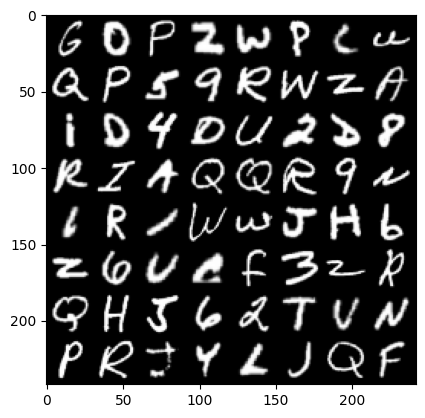

In [7]:
data , label = next(iter(train_loader))
print(data.shape)
print(label.shape)
imshow(torchvision.utils.make_grid(data))


#### Draw a heatmap to visualise the pixel intensities of the data for atleat one image

torch.Size([3, 28, 28])


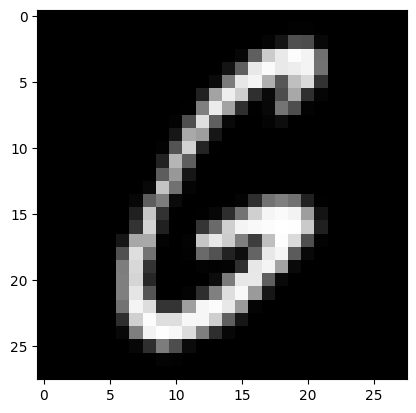

torch.Size([3, 28, 28])


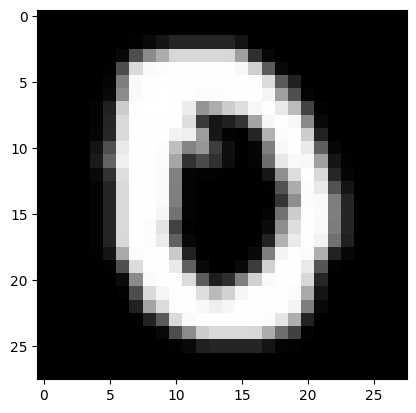

torch.Size([3, 28, 28])


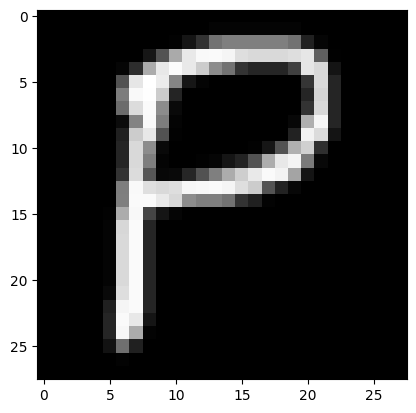

torch.Size([3, 28, 28])


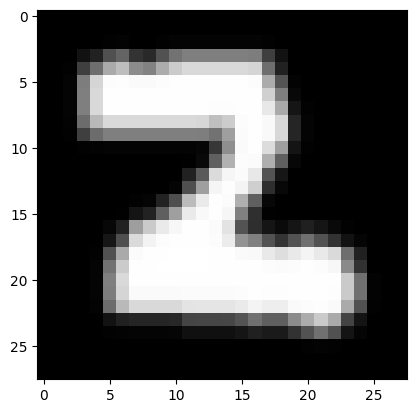

torch.Size([3, 28, 28])


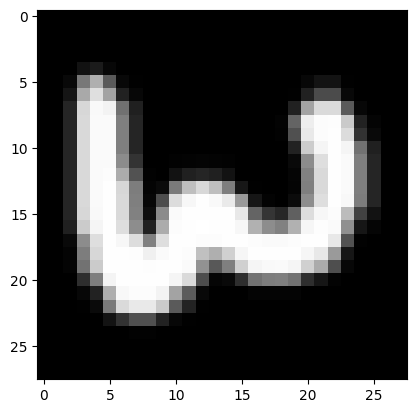

torch.Size([3, 28, 28])


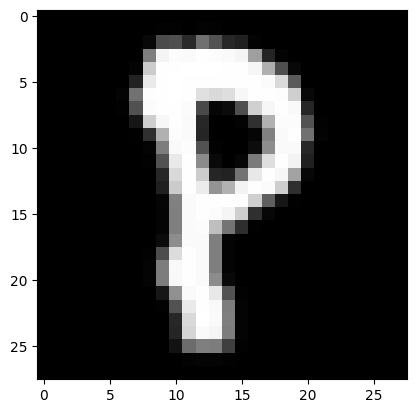

torch.Size([3, 28, 28])


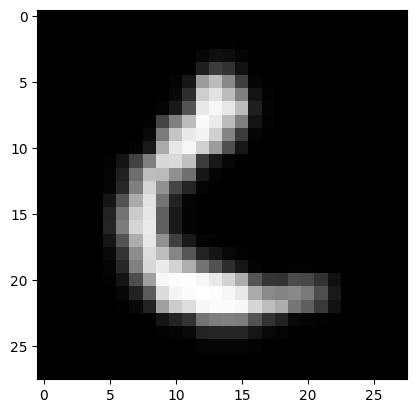

torch.Size([3, 28, 28])


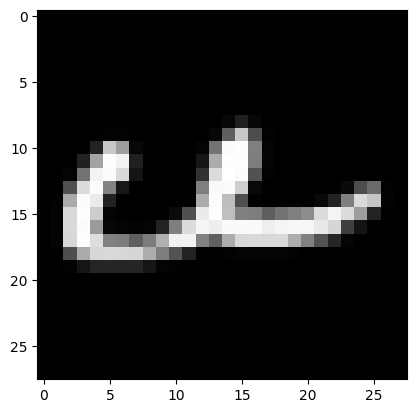

torch.Size([3, 28, 28])


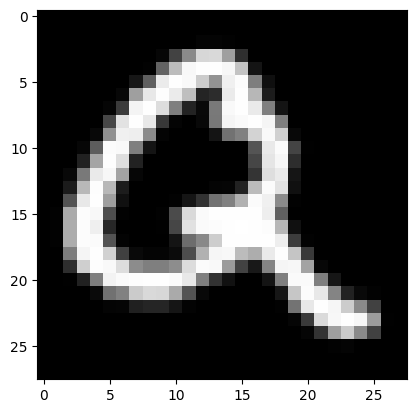

torch.Size([3, 28, 28])


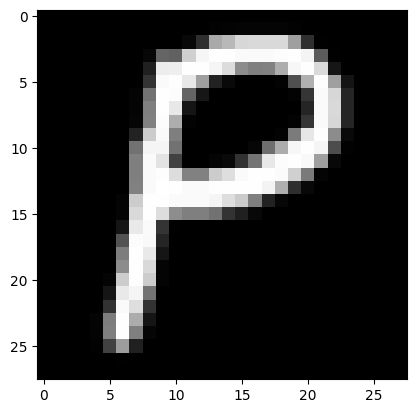

torch.Size([3, 28, 28])


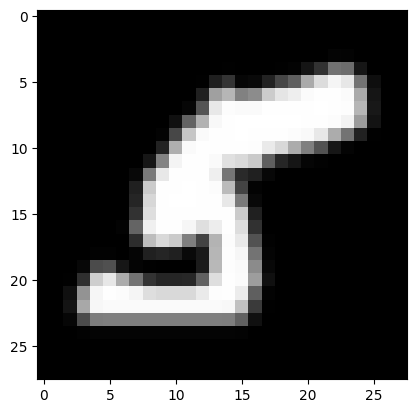

torch.Size([3, 28, 28])


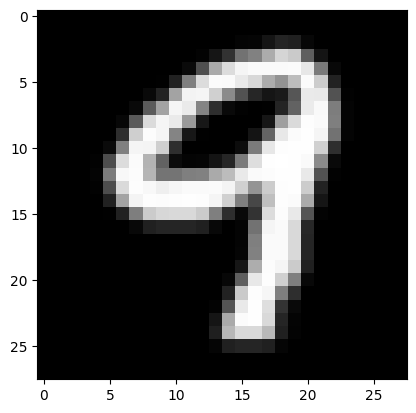

torch.Size([3, 28, 28])


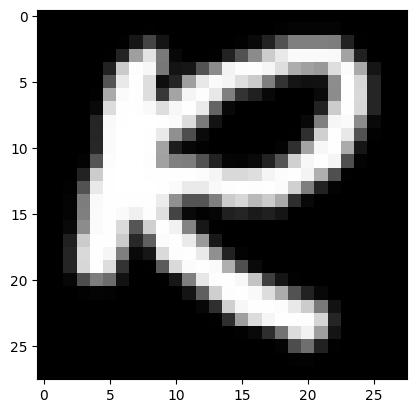

torch.Size([3, 28, 28])


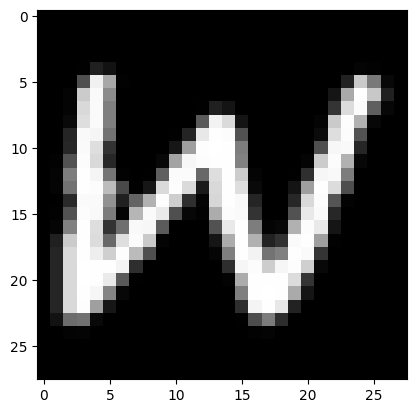

torch.Size([3, 28, 28])


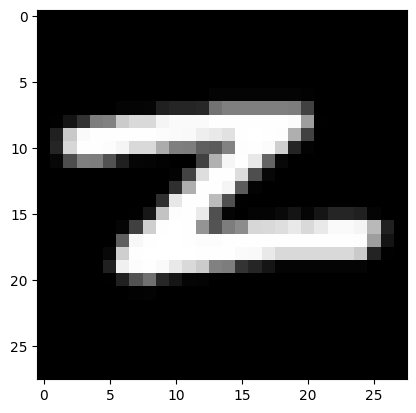

torch.Size([3, 28, 28])


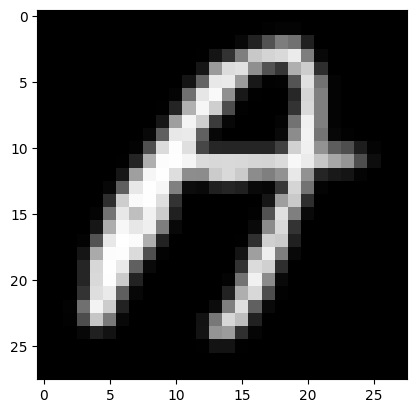

torch.Size([3, 28, 28])


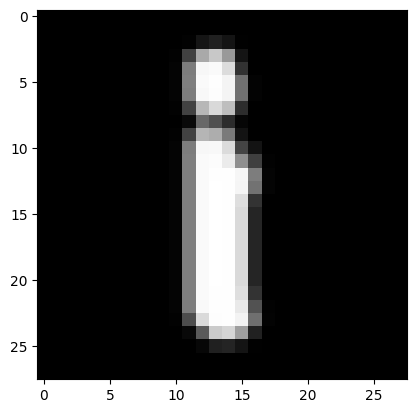

torch.Size([3, 28, 28])


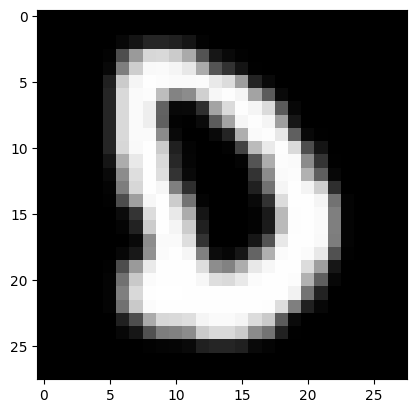

torch.Size([3, 28, 28])


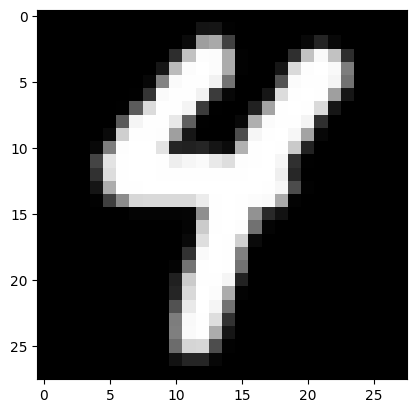

torch.Size([3, 28, 28])


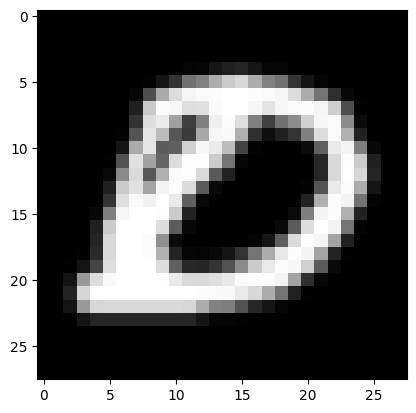

torch.Size([3, 28, 28])


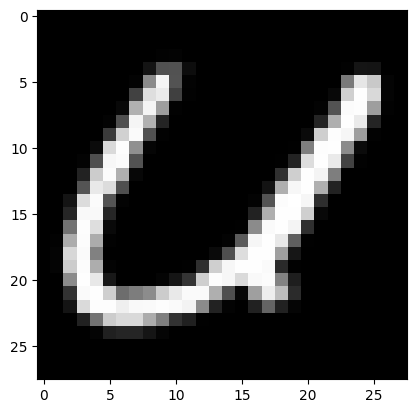

torch.Size([3, 28, 28])


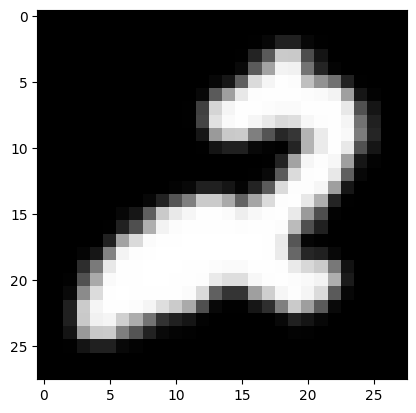

torch.Size([3, 28, 28])


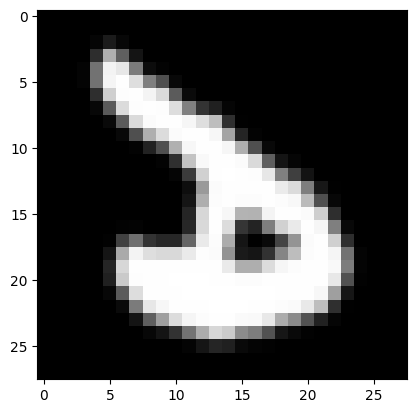

torch.Size([3, 28, 28])


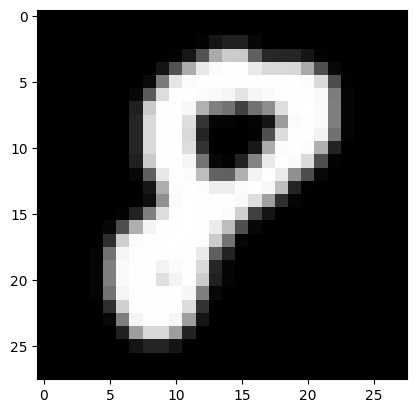

torch.Size([3, 28, 28])


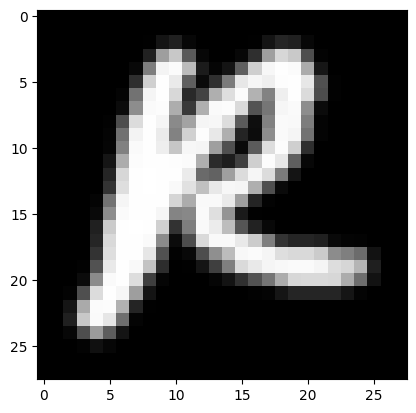

torch.Size([3, 28, 28])


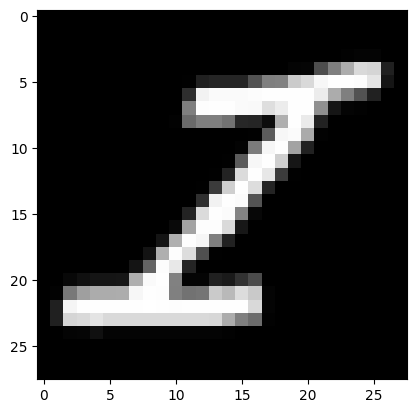

torch.Size([3, 28, 28])


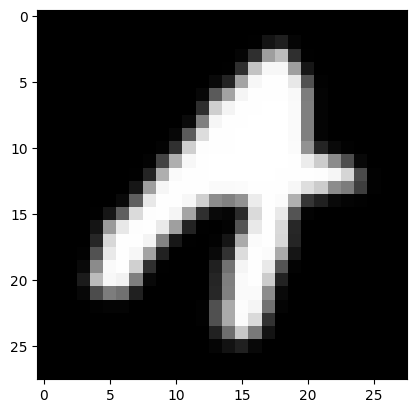

torch.Size([3, 28, 28])


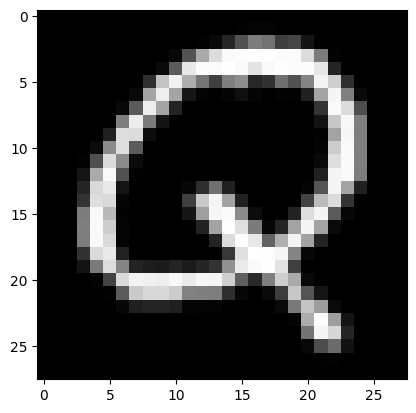

torch.Size([3, 28, 28])


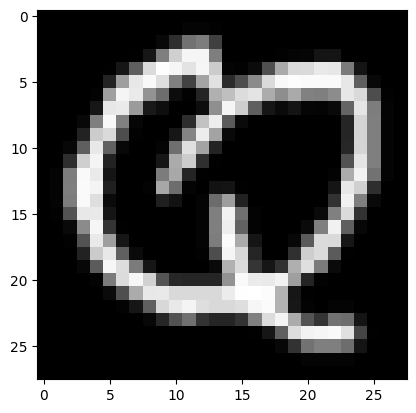

torch.Size([3, 28, 28])


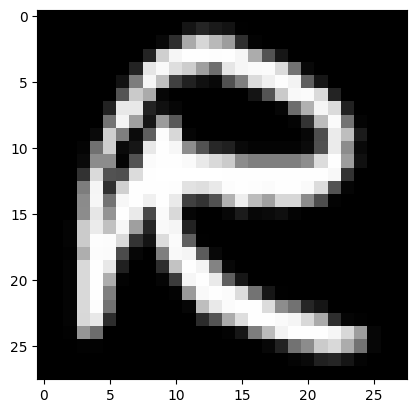

torch.Size([3, 28, 28])


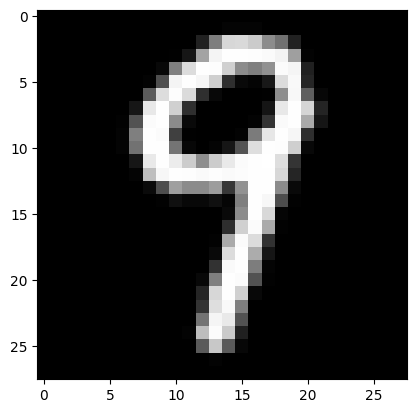

torch.Size([3, 28, 28])


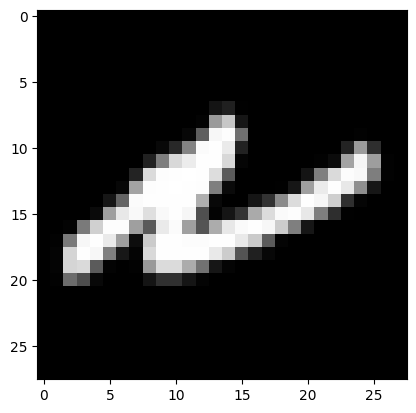

torch.Size([3, 28, 28])


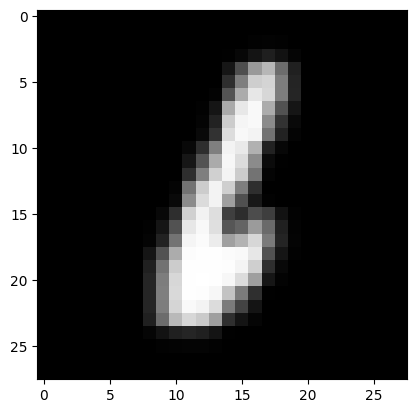

torch.Size([3, 28, 28])


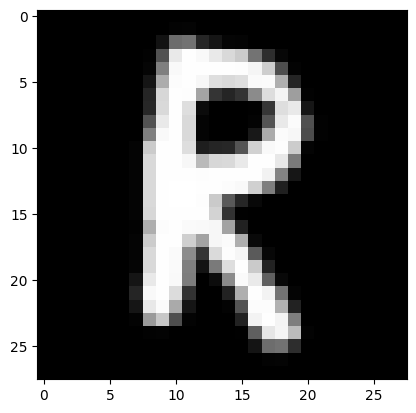

torch.Size([3, 28, 28])


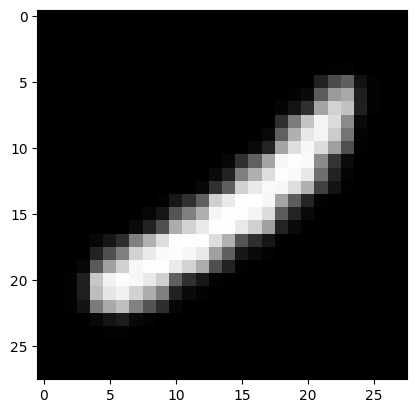

torch.Size([3, 28, 28])


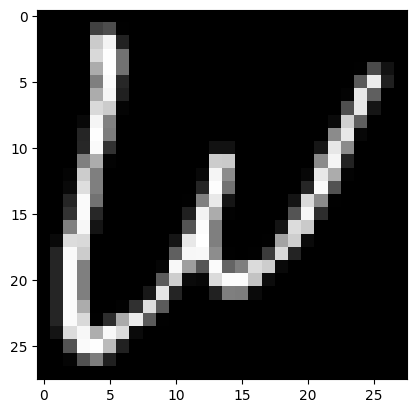

torch.Size([3, 28, 28])


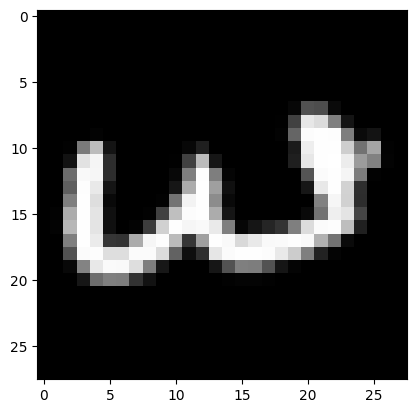

torch.Size([3, 28, 28])


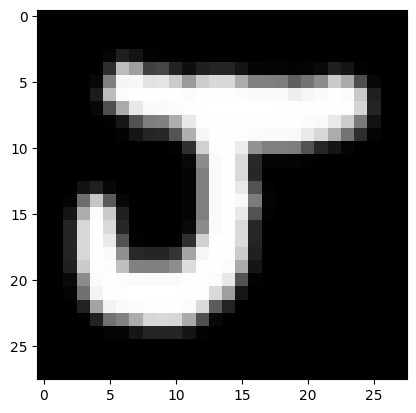

torch.Size([3, 28, 28])


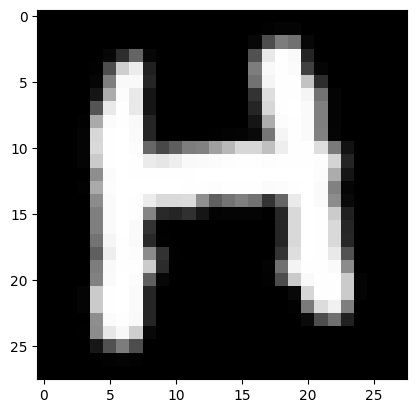

torch.Size([3, 28, 28])


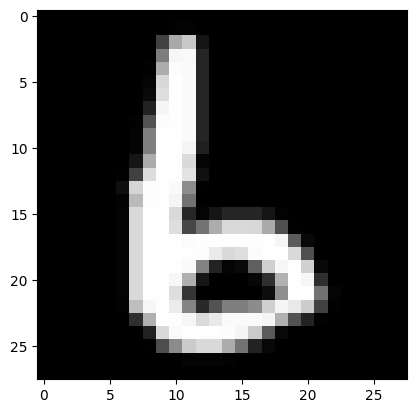

torch.Size([3, 28, 28])


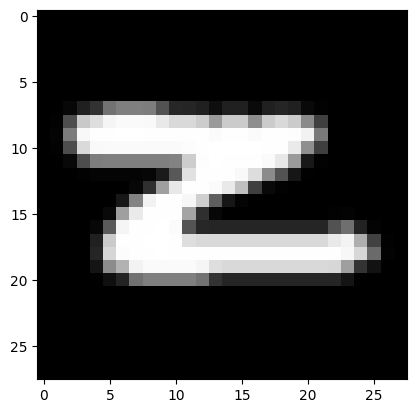

torch.Size([3, 28, 28])


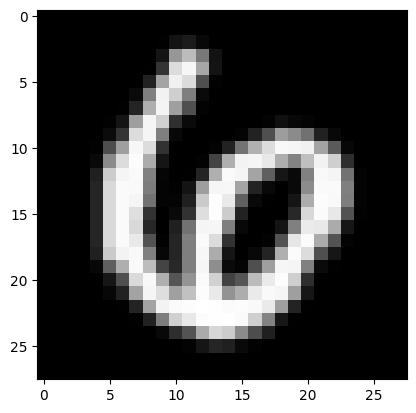

torch.Size([3, 28, 28])


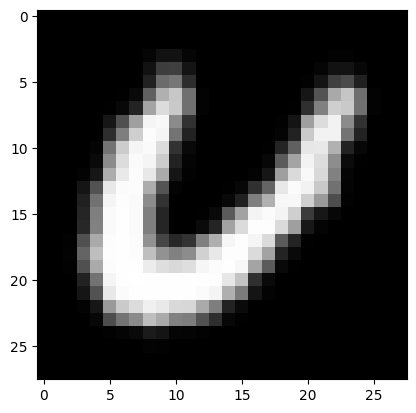

torch.Size([3, 28, 28])


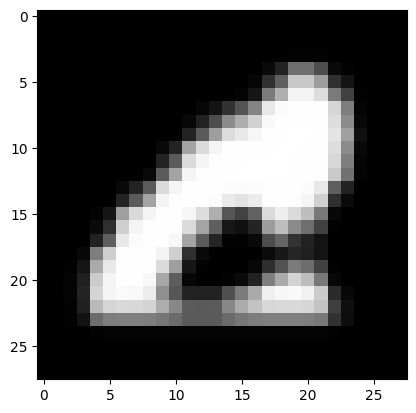

torch.Size([3, 28, 28])


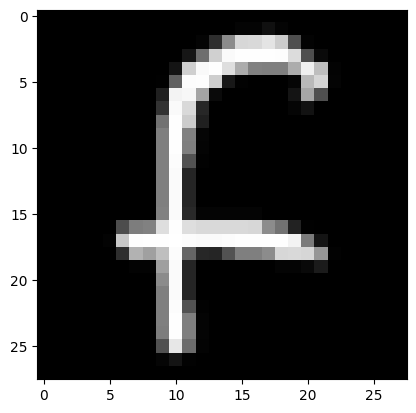

torch.Size([3, 28, 28])


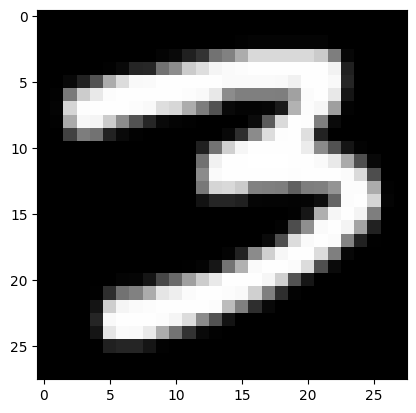

torch.Size([3, 28, 28])


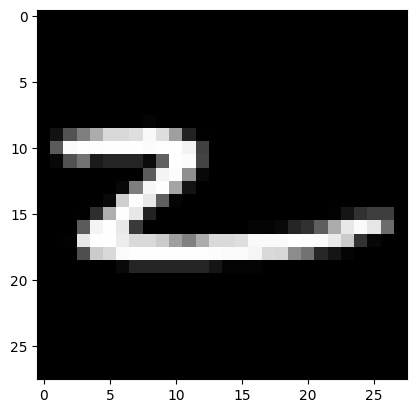

torch.Size([3, 28, 28])


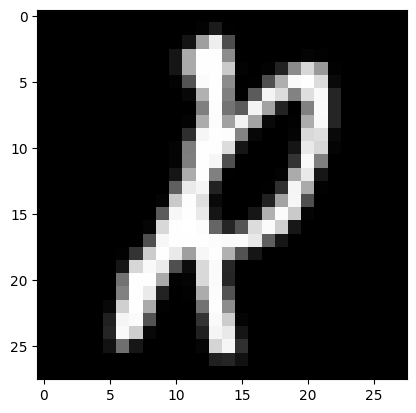

torch.Size([3, 28, 28])


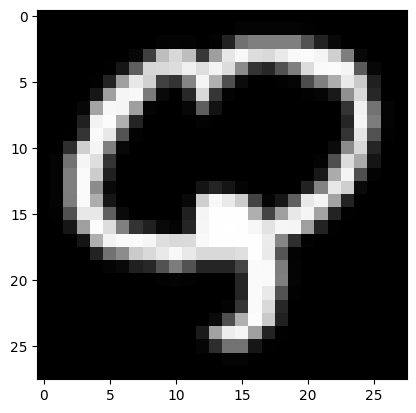

torch.Size([3, 28, 28])


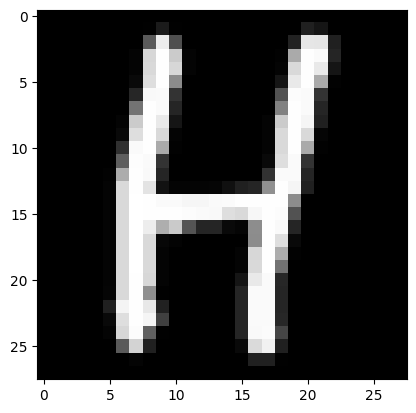

torch.Size([3, 28, 28])


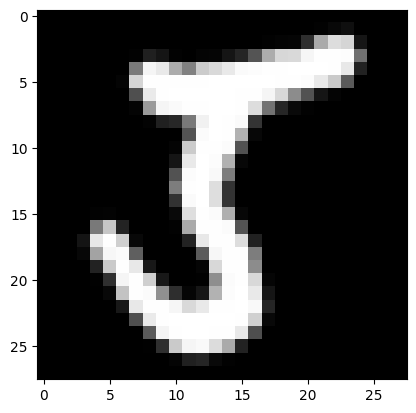

torch.Size([3, 28, 28])


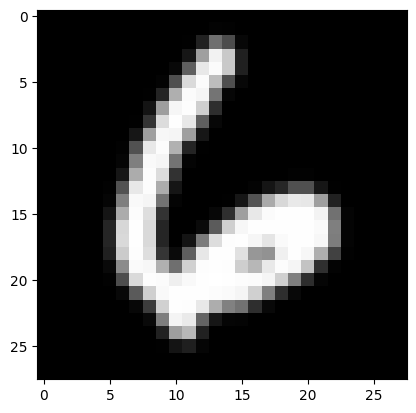

torch.Size([3, 28, 28])


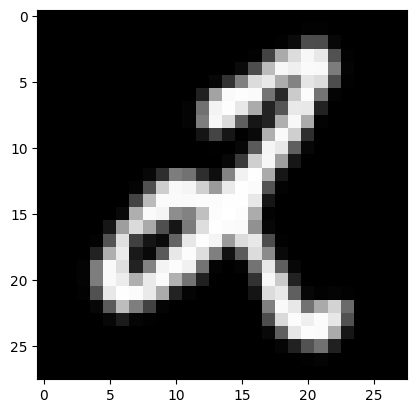

torch.Size([3, 28, 28])


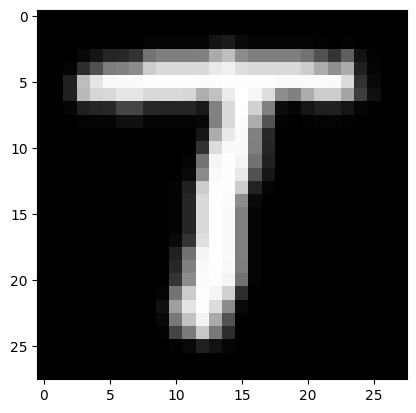

torch.Size([3, 28, 28])


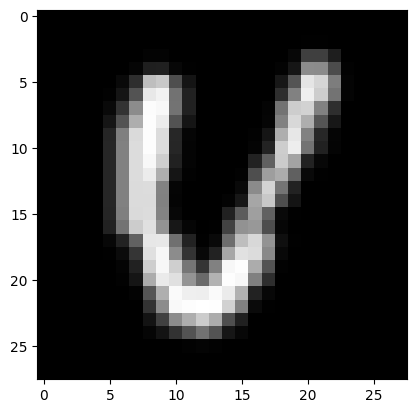

torch.Size([3, 28, 28])


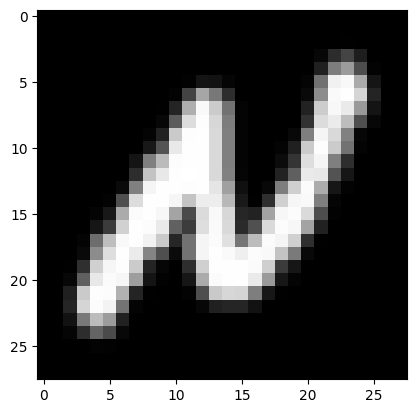

torch.Size([3, 28, 28])


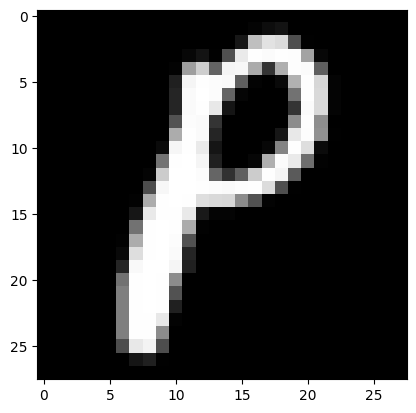

torch.Size([3, 28, 28])


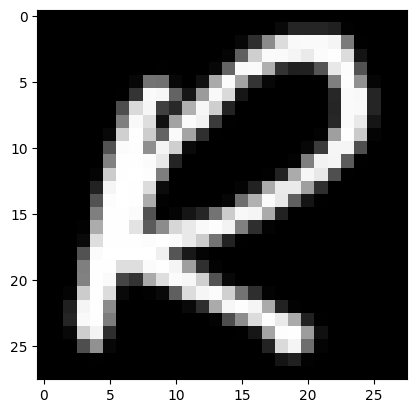

torch.Size([3, 28, 28])


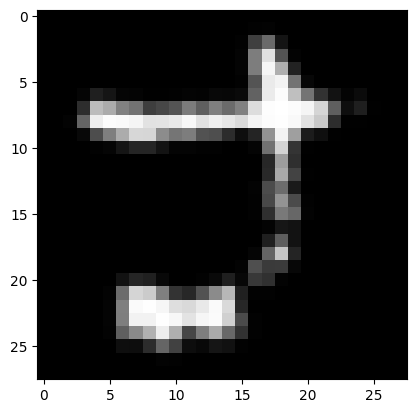

torch.Size([3, 28, 28])


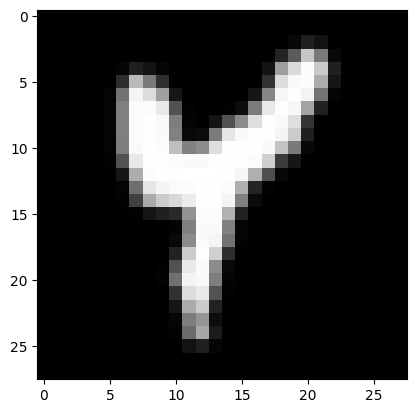

torch.Size([3, 28, 28])


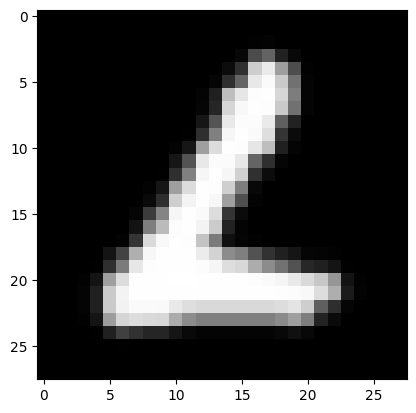

torch.Size([3, 28, 28])


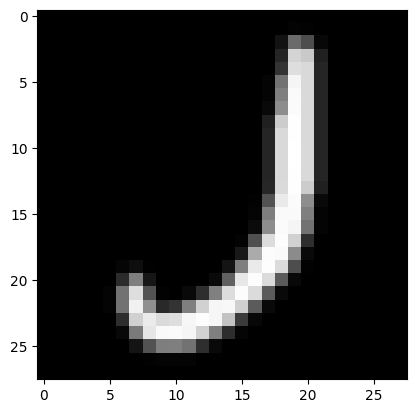

torch.Size([3, 28, 28])


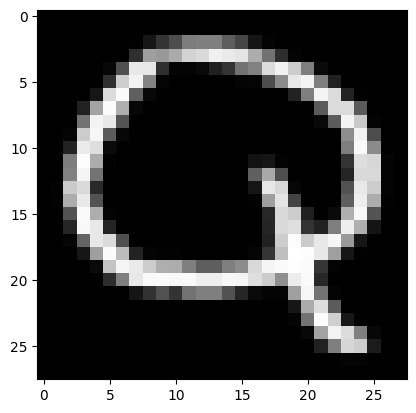

torch.Size([3, 28, 28])


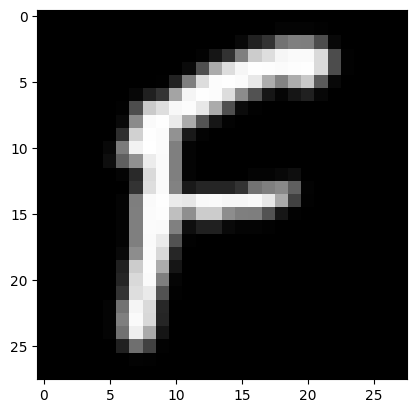

64


In [8]:
cnt = 0
for i in data:
    print(i.shape)
    img = i.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()
    cnt= cnt+1
print(cnt)

#### showing the image along with pixel values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

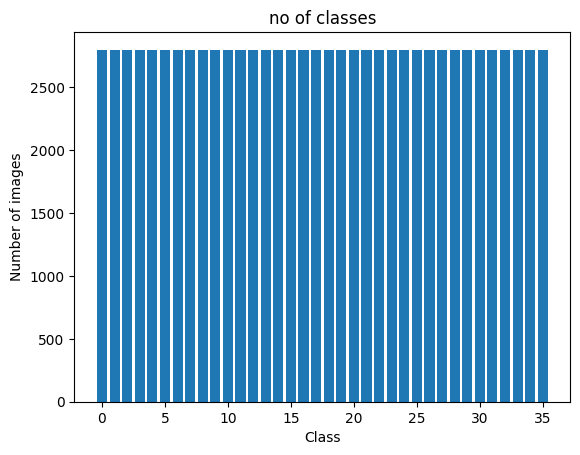

In [9]:
from collections import Counter
all_labels = [label for data, label in dataset]
print(all_labels)
label_counts = Counter(all_labels)
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Class')
plt.title('no of classes')
plt.ylabel('Number of images')
plt.show()

#### Defining and training the basic CNN model

In [10]:
import torch.nn.init as init

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*3, 1800),
            nn.ReLU(),
            nn.Linear(1800, 1200),
            nn.ReLU(),
            nn.Linear(1200, 700),
            nn.ReLU(),
            nn.Linear(700, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 36),
        )

        # Initialize weights using Kaiming (He) initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [11]:
model = CNN()
print(model)

CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2352, out_features=1800, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1800, out_features=1200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1200, out_features=700, bias=True)
    (5): ReLU()
    (6): Linear(in_features=700, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=16, bias=True)
    (13): ReLU()
    (14): Linear(in_features=16, out_features=36, bias=True)
  )
)


In [12]:
# printing summary of the model
summary(model)

Layer (type:depth-idx)                   Param #
CNN                                      --
├─Flatten: 1-1                           --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       4,235,400
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       2,161,200
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       840,700
│    └─ReLU: 2-6                         --
│    └─Linear: 2-7                       358,912
│    └─ReLU: 2-8                         --
│    └─Linear: 2-9                       32,832
│    └─ReLU: 2-10                        --
│    └─Linear: 2-11                      2,080
│    └─ReLU: 2-12                        --
│    └─Linear: 2-13                      528
│    └─ReLU: 2-14                        --
│    └─Linear: 2-15                      612
Total params: 7,632,264
Trainable params: 7,632,264
Non-trainable params: 0

#### defining the functions for train , evaluation and testing the models.

In [13]:
import time
import torch
from sklearn.metrics import precision_recall_fscore_support
from torchmetrics import Accuracy

# loss function : crossentropy
def loss_function(predictions, labels):
    return nn.CrossEntropyLoss()(predictions, labels)

# testing the model

def test_model(test_loader, model):
    total_test_loss = 0.0
    test_predictions = []
    true_test_labels = []
    with torch.no_grad():
      for data, labels in test_loader:
          # Forward pass
          predictions = model(data)
          # Calculating the loss
          total_test_loss += loss_function(predictions, labels).item()
          # Collect predictions and true labels
          data, predicted = torch.max(predictions, 1)
          test_predictions.extend(predicted.numpy())
          true_test_labels.extend(labels.numpy())
    accuracy = Accuracy(task="multiclass", num_classes=36)
    test_acc_value = accuracy(torch.tensor(test_predictions), torch.tensor(true_test_labels))
    average_test_loss = total_test_loss / len(test_loader)
    precision, recall, f1, _ = precision_recall_fscore_support(true_test_labels, test_predictions, average='macro')
    print(f'Average Test Loss: {average_test_loss}')
    print(f'Precision: {precision:.2f}  | Recall: {recall:.2f} | F1 Score: {f1:.2f}')
    print(f'Test Accuracy: {test_acc_value * 100}%')
    return average_test_loss, test_acc_value, precision, recall, f1, test_predictions, true_test_labels



# training the model and evaluating on the train_loader and validation loader

def train_model(train_loader,val_loader,test_loader, model, num_epochs):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    # defining the optimiser
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

    # for each epoch

    for epoch in range(num_epochs):
        print(f'In Epoch {epoch + 1}')

        # Training
        model.train()
        total_train_loss = 0.0
        train_predictions = []
        true_train_labels = []

        # each batch in train loader
        for data, labels in train_loader:
            # Forward pass
            predictions = model(data)
            # calculating the  loss
            loss = loss_function(predictions, labels)
            total_train_loss += loss.item()
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Collect predictions and true labels
            data, predicted = torch.max(predictions, 1)
            train_predictions.extend(predicted.numpy())
            true_train_labels.extend(labels.numpy())

        accuracy = Accuracy(task="multiclass", num_classes=36)
        train_acc_value = accuracy(torch.tensor(train_predictions), torch.tensor(true_train_labels))
        train_losses.append(total_train_loss / len(train_loader))
        train_accuracies.append(train_acc_value)
        print(f"Training Accuracy: {train_acc_value * 100}%  | Trainining Loss: {train_losses[-1]} ")

        # model in evaluation mode
        total_val_loss = 0.0
        val_predictions = []
        val_true_labels = []
        model.eval()
        with torch.no_grad():
            for data, labels in val_loader:
                predictions = model(data)
                val_loss = loss_function(predictions, labels)
                total_val_loss += val_loss.item()

                # Collect predictions and true labels
                _, predicted = torch.max(predictions, 1)
                val_predictions.extend(predicted.numpy())
                val_true_labels.extend(labels.numpy())

        accuracy = Accuracy(task="multiclass", num_classes=36)
        val_acc_value = accuracy(torch.tensor(val_predictions), torch.tensor(val_true_labels))
        val_losses.append(total_val_loss / len(val_loader))
        val_accuracies.append(val_acc_value)

        print(f"Validation Accuracy: {val_acc_value * 100}%  | Validation Loss: {val_losses[-1]}")
    test_acc_value, precision, recall, f1, test_predictions, true_test_labels, average_test_loss = test_model(test_loader, model)
    return train_losses, val_losses, train_accuracies, val_accuracies, test_acc_value, precision, recall, f1, test_predictions, true_test_labels, average_test_loss


#### Starting the training

In [14]:
training_start_time = time.time()
train_losses, val_losses, train_accuracies, val_accuracies, test_acc_value, precision, recall, f1, test_predictions, true_test_labels, average_test_loss = train_model(train_loader, val_loader, test_loader, model ,100)
train_model_time = time.time() - training_start_time
print("Training time:", train_model_time)

In Epoch 1
Training Accuracy: 3.6160714626312256%  | Trainining Loss: 3.6180998414281813 
Validation Accuracy: 4.970238208770752%  | Validation Loss: 3.552193668824208
In Epoch 2
Training Accuracy: 5.884176254272461%  | Trainining Loss: 3.519750686865004 
Validation Accuracy: 7.103175163269043%  | Validation Loss: 3.491498892820334
In Epoch 3
Training Accuracy: 7.818700313568115%  | Trainining Loss: 3.461129699434553 
Validation Accuracy: 8.710317611694336%  | Validation Loss: 3.4379522634457937
In Epoch 4
Training Accuracy: 9.438243865966797%  | Trainining Loss: 3.407923122057839 
Validation Accuracy: 10.218254089355469%  | Validation Loss: 3.3885112110572524
In Epoch 5
Training Accuracy: 10.713045120239258%  | Trainining Loss: 3.3575482858551875 
Validation Accuracy: 11.240078926086426%  | Validation Loss: 3.3409531629538236
In Epoch 6
Training Accuracy: 11.80927562713623%  | Trainining Loss: 3.3089366080268983 
Validation Accuracy: 12.063491821289062%  | Validation Loss: 3.294389347

#### Accuracy of the model

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(all_labels, all_preds)
print(accuracy_test*100)


85.37698412698413


#### confusion matrix and ROC curve

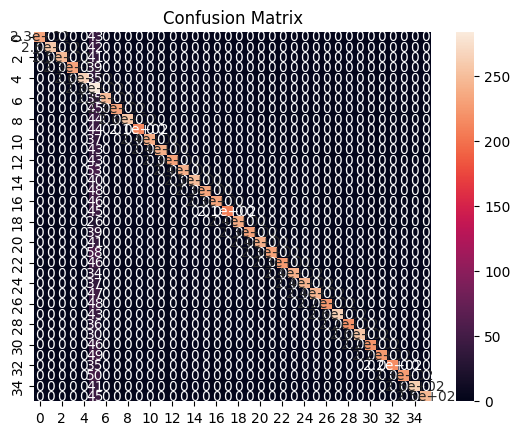

In [ ]:
from sklearn.metrics import confusion_matrix , roc_curve


confusion_matrix = confusion_matrix(all_labels, all_preds)


sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()




#### ROC CURVE FOR THIS DATA  

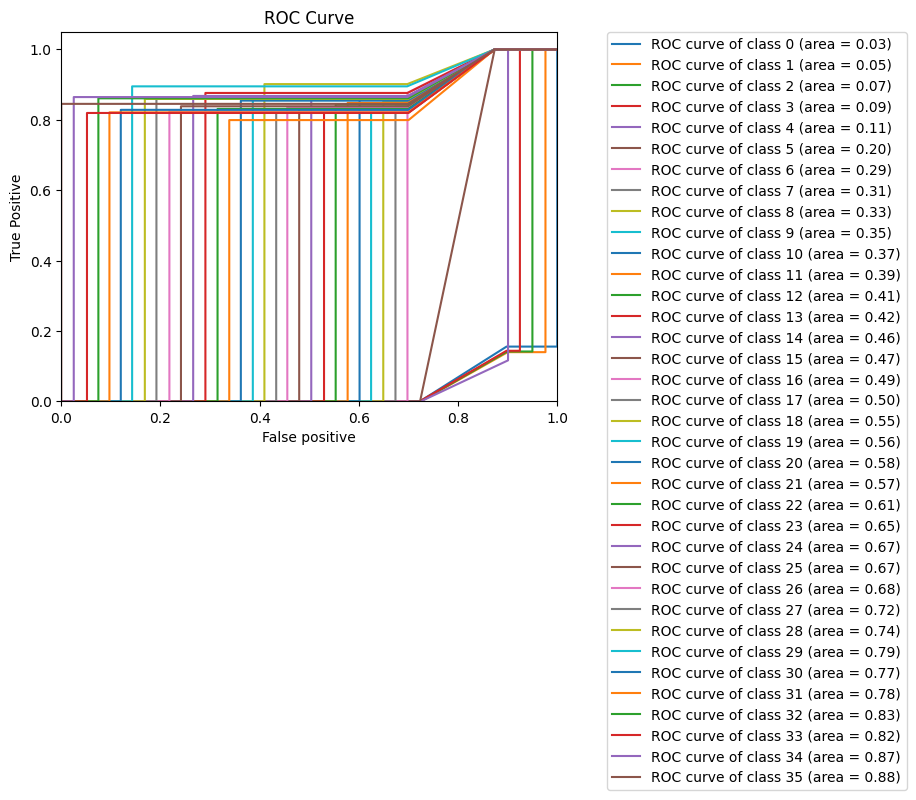

In [ ]:
import sklearn
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 36
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels == i, all_preds)
    roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0.)
plt.show()

#### Printing metrics like F1 score , precision and Recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred =all_preds
y_test = all_labels
precision = precision_score(y_test, y_pred , average = 'macro')
recall = recall_score(y_test, y_pred , average = 'macro')
f1_score = f1_score(y_test, y_pred , average = 'macro')

print(f"Precision: {precision*100}%")
print(f"Recall: {recall*100}%")
print(f"F1 Score: {f1_score*100}%")


Precision: 97.67096447983819%
Recall: 85.35591085709035%
F1 Score: 90.0609704542016%


#### graph for training , testing and validation accuracy

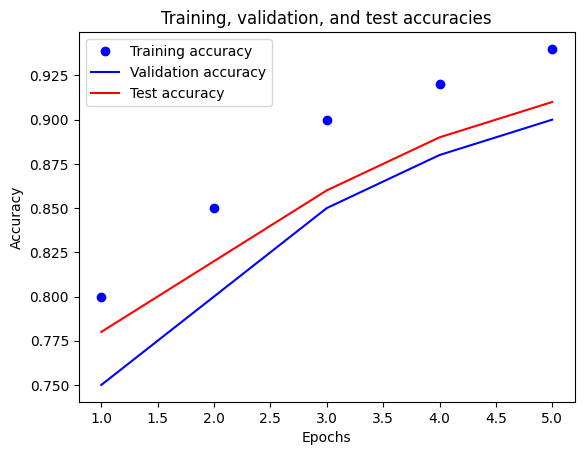

In [ ]:

train_acc = [0.8, 0.85, 0.9, 0.92, 0.94]
val_acc = [0.75, 0.8, 0.85, 0.88, 0.9]
test_acc = [0.78, 0.82, 0.86, 0.89, 0.91]

# Plot accuracies
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.plot(epochs, test_acc, 'r', label='Test accuracy')
plt.title('Training, validation, and test accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

ValueError: ignored

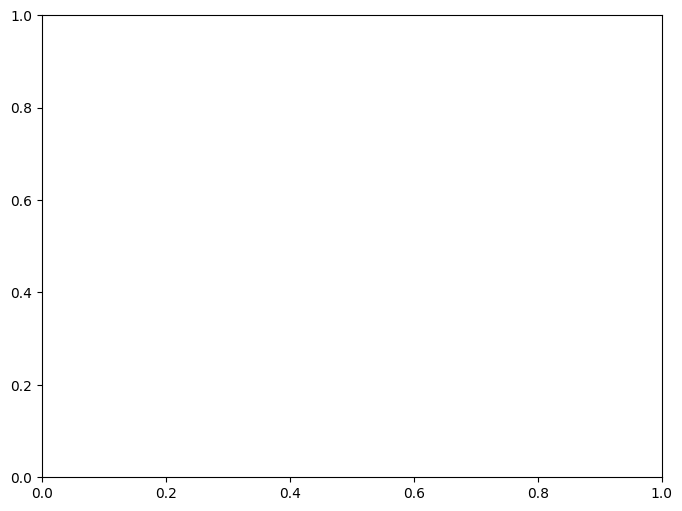

In [ ]:
plt.figure(figsize=(8,6))
epochs_range = range(1, 11)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.axhline(y=accuracy_test, color='b', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title('Accuracy of , Test , Train , validation')
plt.show()